#                                       # Taxi Fare Prediction

In [1]:
##Importing all required modules
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler

# Data Preprocessing

**Read the DataSet**

In [2]:
##Reading the given train data

taxi_data=pd.read_csv('C:\\Users\\yugandhar\\Downloads\\modules\\20190915_Batch67_CSE7305c_ProblemArchitecting (1)\\20190915_Batch67_CSE7305c_ProblemArchitecting\\train.csv')

In [3]:
#Checking the shape of the data
taxi_data.shape

(87958, 18)

In [4]:
#Checking the head of the data
taxi_data.head()

,TID,vendor_id,new_user,tolls_amount,tip_amount,mta_tax,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,rate_code,store_and_fwd_flag,dropoff_longitude,dropoff_latitude,payment_type,surcharge,fare_amount
0,AIX000688685,DST000532,NO,5.33,NaN,0.5,2015-06-26 21:26:00,2015-06-26 21:52:00,3,-73.865990,40.770710,1,NaN,-73.985572,40.776607,CSH,0.5,38.33
1,AIX000411386,DST000532,NO,0.00,1.9,0.5,2015-04-09 13:24:00,2015-04-09 13:36:00,1,-73.991757,40.735312,1,NaN,-74.002815,40.748917,CRD,0.0,11.90
2,AIX0001135810,DST000401,NO,0.00,3.0,0.5,2015-09-13 14:12:30,2015-09-13 14:30:57,1,-73.948541,40.789180,1,N,-73.978704,40.748040,CRD,0.0,18.00
3,AIX0001005019,DST000401,NO,0.00,NaN,0.5,2015-07-27 08:37:32,2015-07-27 08:42:02,2,-73.974527,40.755829,1,N,-73.977303,40.758622,CSH,0.0,5.00
4,AIX000393080,DST000532,NO,0.00,0.0,0.5,2015-04-26 23:23:00,2015-04-26 23:36:00,5,-73.998870,40.724800,1,NaN,-73.958580,40.708610,CRD,0.5,13.50


**Hisyogram plot for fare_amount**

In [5]:
taxi_data['fare_amount'].hist()


In [6]:
#Data Types for the data.

taxi_data.dtypes

TID                    object
vendor_id              object
new_user               object
tolls_amount          float64
tip_amount            float64
mta_tax               float64
pickup_datetime        object
dropoff_datetime       object
passenger_count         int64
pickup_longitude      float64
pickup_latitude       float64
rate_code               int64
store_and_fwd_flag     object
dropoff_longitude     float64
dropoff_latitude      float64
payment_type           object
surcharge             float64
fare_amount           float64
dtype: object

In [7]:
##Describing the given train data

taxi_data.describe()

,tolls_amount,tip_amount,mta_tax,passenger_count,pickup_longitude,pickup_latitude,rate_code,dropoff_longitude,dropoff_latitude,surcharge,fare_amount
count,87958.000000,79150.000000,87958.000000,87958.000000,85346.000000,86168.000000,87958.000000,87679.000000,87544.000000,82693.000000,87958.000000
mean,0.271402,1.532579,0.497948,1.734908,-72.588214,39.991795,1.035312,-72.599128,39.995261,0.318153,15.225970
std,1.276428,2.369551,0.032496,1.401843,10.033457,5.509783,0.279604,9.992113,5.498756,0.361798,12.803014
min,0.000000,0.000000,-0.500000,0.000000,-81.169787,0.000000,0.000000,-74.436935,0.000000,-0.500000,0.000000
25%,0.000000,0.000000,0.500000,1.000000,-73.991988,40.735111,1.000000,-73.991470,40.733639,0.000000,8.150000
50%,0.000000,1.000000,0.500000,1.000000,-73.981738,40.752667,1.000000,-73.980077,40.752892,0.000000,11.400000
75%,0.000000,2.100000,0.500000,2.000000,-73.967010,40.767118,1.000000,-73.962918,40.768220,0.500000,17.000000
max,23.500000,98.550000,0.500000,6.000000,0.000000,50.514841,6.000000,0.000000,41.465904,2.500000,480.000000


In [8]:
## Dropping unwanted columns

taxi_data1=taxi_data.drop(["TID","store_and_fwd_flag","tip_amount"],axis=1)

In [9]:
## Checking the data after dropping the unwanted columns

taxi_data1.head()

,vendor_id,new_user,tolls_amount,mta_tax,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,rate_code,dropoff_longitude,dropoff_latitude,payment_type,surcharge,fare_amount
0,DST000532,NO,5.33,0.5,2015-06-26 21:26:00,2015-06-26 21:52:00,3,-73.865990,40.770710,1,-73.985572,40.776607,CSH,0.5,38.33
1,DST000532,NO,0.00,0.5,2015-04-09 13:24:00,2015-04-09 13:36:00,1,-73.991757,40.735312,1,-74.002815,40.748917,CRD,0.0,11.90
2,DST000401,NO,0.00,0.5,2015-09-13 14:12:30,2015-09-13 14:30:57,1,-73.948541,40.789180,1,-73.978704,40.748040,CRD,0.0,18.00
3,DST000401,NO,0.00,0.5,2015-07-27 08:37:32,2015-07-27 08:42:02,2,-73.974527,40.755829,1,-73.977303,40.758622,CSH,0.0,5.00
4,DST000532,NO,0.00,0.5,2015-04-26 23:23:00,2015-04-26 23:36:00,5,-73.998870,40.724800,1,-73.958580,40.708610,CRD,0.5,13.50


In [10]:
##Calculating the distance using the pickup_latitude,pickup_longitude,dropoff_latitude,dropoff_longitude
##Calculating the time duration from pickup_datetime,dropoff_datetime

def getDistance(pickup_latitude, pickup_longitude, dropoff_latitude, dropoff_longitude):
    R_earth = 6371
    pickup_latitude, pickup_longitude, dropoff_latitude, dropoff_longitude = map(np.radians, [pickup_latitude, pickup_longitude, dropoff_latitude, dropoff_longitude])
    dlat = dropoff_latitude - pickup_latitude
    dlon = dropoff_longitude - pickup_longitude
    a = np.sin(dlat/2.0)*2 + np.cos(pickup_latitude) * np.cos(dropoff_latitude) * np.sin(dlon/2.0)*2
    return 2 * R_earth * np.arcsin(np.sqrt(a))
taxi_data1['dist'] = getDistance( taxi_data1.pickup_latitude,taxi_data1.pickup_longitude,taxi_data1.dropoff_latitude,taxi_data1.dropoff_longitude)


taxi_data1.pickup_datetime = pd.to_datetime(taxi_data1.pickup_datetime)
taxi_data1['pickup_time'] = taxi_data1.pickup_datetime.dt.time
taxi_data1['pickup_hour'] = taxi_data1.pickup_datetime.dt.hour
taxi_data1['pickup_day'] = taxi_data1.pickup_datetime.dt.day
taxi_data1['pickup_month'] = taxi_data1.pickup_datetime.dt.month
taxi_data1['pickup_weekday'] = taxi_data1.pickup_datetime.dt.weekday


taxi_data1.dropoff_datetime = pd.to_datetime(taxi_data1.dropoff_datetime)
taxi_data1['dropoff_time'] = taxi_data1.dropoff_datetime.dt.time
taxi_data1['dropoff_hour'] = taxi_data1.dropoff_datetime.dt.hour
taxi_data1['dropoff_day'] = taxi_data1.dropoff_datetime.dt.day
taxi_data1['dropoff_month'] = taxi_data1.dropoff_datetime.dt.month
taxi_data1['dropoff_weekday'] = taxi_data1.dropoff_datetime.dt.weekday

taxi_data1['duration']= taxi_data1.dropoff_datetime - taxi_data1.pickup_datetime
taxi_data1.duration=taxi_data1.duration.dt.total_seconds()
taxi_data1.duration=taxi_data1.duration/60

C:\Users\yugandhar\Anaconda3\lib\site-packages\ipykernel_launcher.py:10: RuntimeWarning: invalid value encountered in sqrt
  # Remove the CWD from sys.path while we load stuff.
C:\Users\yugandhar\Anaconda3\lib\site-packages\ipykernel_launcher.py:10: RuntimeWarning: invalid value encountered in arcsin
  # Remove the CWD from sys.path while we load stuff.


In [11]:
##checking the datatypes of the data 

taxi_data1.dtypes

vendor_id                    object
new_user                     object
tolls_amount                float64
mta_tax                     float64
pickup_datetime      datetime64[ns]
dropoff_datetime     datetime64[ns]
passenger_count               int64
pickup_longitude            float64
pickup_latitude             float64
rate_code                     int64
dropoff_longitude           float64
dropoff_latitude            float64
payment_type                 object
surcharge                   float64
fare_amount                 float64
dist                        float64
pickup_time                  object
pickup_hour                   int64
pickup_day                    int64
pickup_month                  int64
pickup_weekday                int64
dropoff_time                 object
dropoff_hour                  int64
dropoff_day                   int64
dropoff_month                 int64
dropoff_weekday               int64
duration                    float64
dtype: object

In [12]:
##Checking the head of the data

taxi_data1.head()

,vendor_id,new_user,tolls_amount,mta_tax,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,rate_code,...,pickup_hour,pickup_day,pickup_month,pickup_weekday,dropoff_time,dropoff_hour,dropoff_day,dropoff_month,dropoff_weekday,duration
0,DST000532,NO,5.33,0.5,2015-06-26 21:26:00,2015-06-26 21:52:00,3,-73.865990,40.770710,1,...,21,26,6,4,21:52:00,21,26,6,4,26.00
1,DST000532,NO,0.00,0.5,2015-04-09 13:24:00,2015-04-09 13:36:00,1,-73.991757,40.735312,1,...,13,9,4,3,13:36:00,13,9,4,3,12.00
2,DST000401,NO,0.00,0.5,2015-09-13 14:12:30,2015-09-13 14:30:57,1,-73.948541,40.789180,1,...,14,13,9,6,14:30:57,14,13,9,6,18.45
3,DST000401,NO,0.00,0.5,2015-07-27 08:37:32,2015-07-27 08:42:02,2,-73.974527,40.755829,1,...,8,27,7,0,08:42:02,8,27,7,0,4.50
4,DST000532,NO,0.00,0.5,2015-04-26 23:23:00,2015-04-26 23:36:00,5,-73.998870,40.724800,1,...,23,26,4,6,23:36:00,23,26,4,6,13.00


In [13]:
##Dropping unwanted columns
taxi_data2=taxi_data1.drop(["pickup_datetime","dropoff_datetime","pickup_longitude","pickup_latitude","dropoff_longitude","dropoff_latitude","pickup_time","dropoff_time","dropoff_hour","dropoff_day","dropoff_month","dropoff_weekday","pickup_day","pickup_month","pickup_hour","pickup_weekday"],axis=1)

In [14]:
taxi_data2.head()

,vendor_id,new_user,tolls_amount,mta_tax,passenger_count,rate_code,payment_type,surcharge,fare_amount,dist,duration
0,DST000532,NO,5.33,0.5,3,1,CSH,0.5,38.33,NaN,26.00
1,DST000532,NO,0.00,0.5,1,1,CRD,0.0,11.90,143.407445,12.00
2,DST000401,NO,0.00,0.5,1,1,CRD,0.0,18.00,NaN,18.45
3,DST000401,NO,0.00,0.5,2,1,CSH,0.0,5.00,58.317946,4.50
4,DST000532,NO,0.00,0.5,5,1,CRD,0.5,13.50,140.396982,13.00


**Visualition plot for correlation**

In [50]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [16]:
temp=taxi_data2.corr()

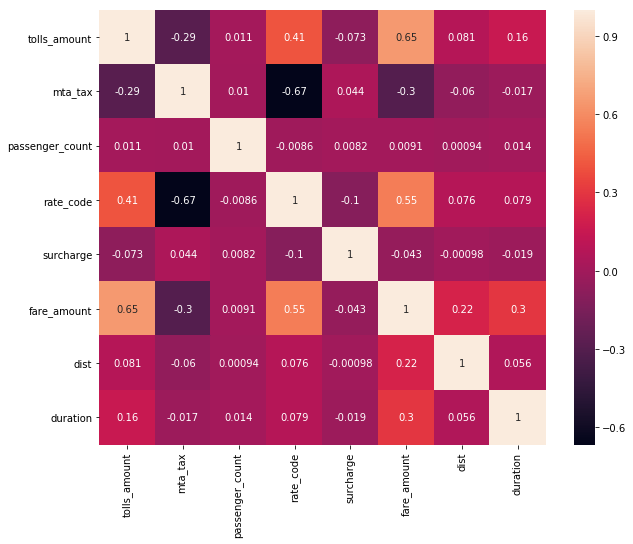

In [17]:
fig = plt.figure(figsize=(10,8))
sns.heatmap(temp,annot=True)

In [18]:
corr=taxi_data2.corr()
corr.sort_values(by=["fare_amount"],ascending=False).iloc[0].sort_values(ascending=False)

fare_amount        1.000000
tolls_amount       0.652383
rate_code          0.545032
duration           0.298761
dist               0.218392
passenger_count    0.009077
surcharge         -0.042670
mta_tax           -0.298863
Name: fare_amount, dtype: float64

Text(0, 0.5, 'Frequency')

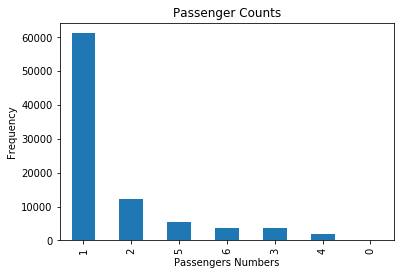

In [19]:
##plot for the frequency distribution of passenger count

taxi_data2['passenger_count'].value_counts().plot.bar();
plt.title('Passenger Counts')
plt.xlabel('Passengers Numbers') 
plt.ylabel('Frequency')

Text(0.5, 1.0, 'dist vs fare_amount')

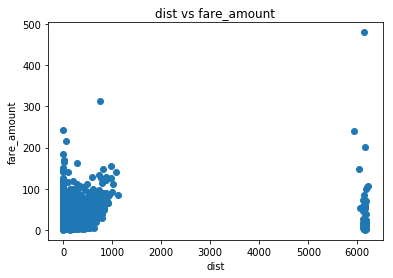

In [20]:
##plot for fare_amount vs dist

plt.scatter(x=taxi_data2['dist'],y=taxi_data2['fare_amount'])
plt.xlabel('dist')
plt.ylabel('fare_amount')
plt.title('dist vs fare_amount')

**Datatype Conversion**

In [21]:
taxi_data2.dtypes

vendor_id           object
new_user            object
tolls_amount       float64
mta_tax            float64
passenger_count      int64
rate_code            int64
payment_type        object
surcharge          float64
fare_amount        float64
dist               float64
duration           float64
dtype: object

In [22]:
cat_cols = ["new_user","rate_code","vendor_id","payment_type"]
num_cols = ["dist", 'fare_amount','mta_tax','tolls_amount','duration','surcharge','passenger_count']
num_cols

['dist',
 'fare_amount',
 'mta_tax',
 'tolls_amount',
 'duration',
 'surcharge',
 'passenger_count']

In [23]:
taxi_data2[cat_cols] = taxi_data2[cat_cols].apply(lambda x: x.astype('category'))
taxi_data2[num_cols] = taxi_data2[num_cols].apply(lambda x: x.astype('float'))
taxi_data2.dtypes

vendor_id          category
new_user           category
tolls_amount        float64
mta_tax             float64
passenger_count     float64
rate_code          category
payment_type       category
surcharge           float64
fare_amount         float64
dist                float64
duration            float64
dtype: object

**Imputation**

In [24]:
taxi_data2.isnull().sum()

vendor_id              0
new_user               1
tolls_amount           0
mta_tax                0
passenger_count        0
rate_code              0
payment_type           0
surcharge           5265
fare_amount            0
dist               44834
duration               0
dtype: int64

In [25]:
num_data = taxi_data2.loc[:,num_cols]
cat_data = taxi_data2.loc[:,cat_cols]

In [26]:
# Numeric columns imputation
imp = SimpleImputer(missing_values=np.nan, strategy='mean')
num_data = pd.DataFrame(imp.fit_transform(num_data),columns=num_cols)

# Categorical columns imputation
imp = SimpleImputer(missing_values=np.nan, strategy='most_frequent')
cat_data = pd.DataFrame(imp.fit_transform(cat_data),columns=cat_cols)


print(num_data.isnull().sum())
print(cat_data.isnull().sum())

dist               0
fare_amount        0
mta_tax            0
tolls_amount       0
duration           0
surcharge          0
passenger_count    0
dtype: int64
new_user        0
rate_code       0
vendor_id       0
payment_type    0
dtype: int64


In [27]:
taxi_data3= pd.concat([num_data,cat_data],axis=1)

In [28]:
taxi_data3.head()

,dist,fare_amount,mta_tax,tolls_amount,duration,surcharge,passenger_count,new_user,rate_code,vendor_id,payment_type
0,260.149020,38.33,0.5,5.33,26.00,0.5,3.0,NO,1,DST000532,CSH
1,143.407445,11.90,0.5,0.00,12.00,0.0,1.0,NO,1,DST000532,CRD
2,260.149020,18.00,0.5,0.00,18.45,0.0,1.0,NO,1,DST000401,CRD
3,58.317946,5.00,0.5,0.00,4.50,0.0,2.0,NO,1,DST000401,CSH
4,140.396982,13.50,0.5,0.00,13.00,0.5,5.0,NO,1,DST000532,CRD


In [29]:
taxi_data3.shape

(87958, 11)

In [30]:
taxi_data3.describe()

,dist,fare_amount,mta_tax,tolls_amount,duration,surcharge,passenger_count
count,87958.000000,87958.000000,87958.000000,87958.000000,87958.000000,87958.000000,87958.000000
mean,260.149020,15.225970,0.497948,0.271402,13.556458,0.318153,1.734908
std,255.734894,12.803014,0.032496,1.276428,26.056867,0.350803,1.401843
min,0.000000,0.000000,-0.500000,0.000000,-0.700000,-0.500000,0.000000
25%,229.069163,8.150000,0.500000,0.000000,6.366667,0.000000,1.000000
50%,260.149020,11.400000,0.500000,0.000000,10.766667,0.318153,1.000000
75%,260.149020,17.000000,0.500000,0.000000,17.000000,0.500000,2.000000
max,6209.979066,480.000000,0.500000,23.500000,2874.733333,2.500000,6.000000


In [31]:
##dropping unwanted rows
taxi_data3 = taxi_data3[(taxi_data3['duration']<200)&(taxi_data3['duration']>0)]

In [32]:
taxi_data3 = taxi_data3[(taxi_data3['dist']<300)&(taxi_data3['dist']>0)]

In [33]:
taxi_data3 = taxi_data3[(taxi_data3['passenger_count']>0)]

**Creating Dummies**

In [34]:
taxi_data4=pd.get_dummies(taxi_data3,columns=["new_user","vendor_id","rate_code","payment_type"])

In [35]:
taxi_data4.head()

,dist,fare_amount,mta_tax,tolls_amount,duration,surcharge,passenger_count,new_user_NO,new_user_YES,vendor_id_DST000401,...,rate_code_2,rate_code_3,rate_code_4,rate_code_5,rate_code_6,payment_type_CRD,payment_type_CSH,payment_type_DIS,payment_type_NOC,payment_type_UNK
0,260.149020,38.33,0.5,5.33,26.00,0.5,3.0,1,0,0,...,0,0,0,0,0,0,1,0,0,0
1,143.407445,11.90,0.5,0.00,12.00,0.0,1.0,1,0,0,...,0,0,0,0,0,1,0,0,0,0
2,260.149020,18.00,0.5,0.00,18.45,0.0,1.0,1,0,1,...,0,0,0,0,0,1,0,0,0,0
3,58.317946,5.00,0.5,0.00,4.50,0.0,2.0,1,0,1,...,0,0,0,0,0,0,1,0,0,0
4,140.396982,13.50,0.5,0.00,13.00,0.5,5.0,1,0,0,...,0,0,0,0,0,1,0,0,0,0


In [36]:
taxi_data4.shape

(73142, 25)

In [37]:
taxi_data4.describe()

,dist,fare_amount,mta_tax,tolls_amount,duration,surcharge,passenger_count,new_user_NO,new_user_YES,vendor_id_DST000401,...,rate_code_2,rate_code_3,rate_code_4,rate_code_5,rate_code_6,payment_type_CRD,payment_type_CSH,payment_type_DIS,payment_type_NOC,payment_type_UNK
count,73142.000000,73142.000000,73142.000000,73142.000000,73142.000000,73142.000000,73142.000000,73142.000000,73142.000000,73142.000000,...,73142.000000,73142.000000,73142.000000,73142.000000,73142.000000,73142.000000,73142.000000,73142.000000,73142.000000,73142.000000
mean,230.560987,13.866751,0.498175,0.235086,12.180158,0.315141,1.733218,0.999945,0.000055,0.355323,...,0.018047,0.001900,0.000068,0.002064,0.000014,0.581130,0.411843,0.000779,0.002256,0.003992
std,56.661866,11.905806,0.030604,1.219792,9.656157,0.355201,1.400590,0.007395,0.007395,0.478614,...,0.133123,0.043553,0.008268,0.045390,0.003698,0.493377,0.492170,0.027905,0.047443,0.063058
min,0.918941,0.000000,-0.500000,0.000000,0.016667,-0.500000,1.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,216.578892,7.800000,0.500000,0.000000,6.000000,0.000000,1.000000,1.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,260.149020,10.500000,0.500000,0.000000,9.650000,0.318153,1.000000,1.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
75%,260.149020,14.900000,0.500000,0.000000,15.116667,0.500000,2.000000,1.000000,0.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000
max,299.996386,300.000000,0.500000,23.500000,146.000000,2.500000,6.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [38]:
taxi_data4.columns

Index(['dist', 'fare_amount', 'mta_tax', 'tolls_amount', 'duration',
       'surcharge', 'passenger_count', 'new_user_NO', 'new_user_YES',
       'vendor_id_DST000401', 'vendor_id_DST000481', 'vendor_id_DST000532',
       'vendor_id_DST000543', 'rate_code_0', 'rate_code_1', 'rate_code_2',
       'rate_code_3', 'rate_code_4', 'rate_code_5', 'rate_code_6',
       'payment_type_CRD', 'payment_type_CSH', 'payment_type_DIS',
       'payment_type_NOC', 'payment_type_UNK'],
      dtype='object')

**Train and Test Split**

In [39]:
#train test split.....
x=taxi_data4.copy().drop('fare_amount',axis=1)
y=taxi_data4['fare_amount']
x_train,x_validation,y_train,y_validation = train_test_split(x,y,test_size=0.3,random_state=1)
print(taxi_data4.shape)
print(x_train.shape)
print(x_validation.shape)
print(y_train.shape)
print(y_validation.shape)

(73142, 25)
(51199, 24)
(21943, 24)
(51199,)
(21943,)


**Standerdization**

In [40]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
scaler.fit(x_train.iloc[:,:6])

x_train.iloc[:,:6]=scaler.transform(x_train.iloc[:,:6])
x_validation.iloc[:,:6]=scaler.transform(x_validation.iloc[:,:6])

C:\Users\yugandhar\Anaconda3\lib\site-packages\pandas\core\indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s
C:\Users\yugandhar\Anaconda3\lib\site-packages\pandas\core\indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


In [41]:
x_train.head()

,dist,mta_tax,tolls_amount,duration,surcharge,passenger_count,new_user_NO,new_user_YES,vendor_id_DST000401,vendor_id_DST000481,...,rate_code_2,rate_code_3,rate_code_4,rate_code_5,rate_code_6,payment_type_CRD,payment_type_CSH,payment_type_DIS,payment_type_NOC,payment_type_UNK
48113,-2.589525,0.061541,-0.192352,-1.036931,0.520032,-0.523013,1,0,1,0,...,0,0,0,0,0,0,1,0,0,0
6610,-2.639623,0.061541,-0.192352,-0.432052,-0.885439,-0.523013,1,0,0,0,...,0,0,0,0,0,0,1,0,0,0
44085,0.523242,0.061541,-0.192352,-0.818072,-0.885439,-0.523013,1,0,1,0,...,0,0,0,0,0,0,1,0,0,0
87140,0.523242,0.061541,-0.192352,0.084938,-0.885439,0.192854,1,0,0,0,...,0,0,0,0,0,0,1,0,0,0
41385,0.523242,0.061541,-0.192352,0.498531,-0.885439,-0.523013,1,0,0,0,...,0,0,0,0,0,0,1,0,0,0


In [42]:
x_train.dtypes

dist                   float64
mta_tax                float64
tolls_amount           float64
duration               float64
surcharge              float64
passenger_count        float64
new_user_NO              uint8
new_user_YES             uint8
vendor_id_DST000401      uint8
vendor_id_DST000481      uint8
vendor_id_DST000532      uint8
vendor_id_DST000543      uint8
rate_code_0              uint8
rate_code_1              uint8
rate_code_2              uint8
rate_code_3              uint8
rate_code_4              uint8
rate_code_5              uint8
rate_code_6              uint8
payment_type_CRD         uint8
payment_type_CSH         uint8
payment_type_DIS         uint8
payment_type_NOC         uint8
payment_type_UNK         uint8
dtype: object

In [43]:
taxi_data4.head()

,dist,fare_amount,mta_tax,tolls_amount,duration,surcharge,passenger_count,new_user_NO,new_user_YES,vendor_id_DST000401,...,rate_code_2,rate_code_3,rate_code_4,rate_code_5,rate_code_6,payment_type_CRD,payment_type_CSH,payment_type_DIS,payment_type_NOC,payment_type_UNK
0,260.149020,38.33,0.5,5.33,26.00,0.5,3.0,1,0,0,...,0,0,0,0,0,0,1,0,0,0
1,143.407445,11.90,0.5,0.00,12.00,0.0,1.0,1,0,0,...,0,0,0,0,0,1,0,0,0,0
2,260.149020,18.00,0.5,0.00,18.45,0.0,1.0,1,0,1,...,0,0,0,0,0,1,0,0,0,0
3,58.317946,5.00,0.5,0.00,4.50,0.0,2.0,1,0,1,...,0,0,0,0,0,0,1,0,0,0
4,140.396982,13.50,0.5,0.00,13.00,0.5,5.0,1,0,0,...,0,0,0,0,0,1,0,0,0,0


In [44]:
x_validation.head()

,dist,mta_tax,tolls_amount,duration,surcharge,passenger_count,new_user_NO,new_user_YES,vendor_id_DST000401,vendor_id_DST000481,...,rate_code_2,rate_code_3,rate_code_4,rate_code_5,rate_code_6,payment_type_CRD,payment_type_CSH,payment_type_DIS,payment_type_NOC,payment_type_UNK
14230,-1.821811,0.061541,-0.192352,-0.638848,-0.885439,-0.523013,1,0,0,0,...,0,0,0,0,0,0,1,0,0,0
10280,0.523242,0.061541,-0.192352,0.720837,-0.885439,-0.523013,1,0,1,0,...,0,0,0,0,0,1,0,0,0,0
11794,0.523242,0.061541,-0.192352,-0.133921,-0.885439,-0.523013,1,0,1,0,...,0,0,0,0,0,1,0,0,0,0
56151,0.523242,0.061541,-0.192352,2.704357,1.925503,-0.523013,1,0,1,0,...,0,0,0,0,0,1,0,0,0,0
13795,0.523242,0.061541,-0.192352,-0.535450,-0.885439,-0.523013,1,0,0,0,...,0,0,0,0,0,0,1,0,0,0


# Model Building

**Linear Regression Model**

In [55]:
from sklearn import linear_model
from sklearn.linear_model import LinearRegression
regressor=LinearRegression()
regressor.fit(x_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [56]:
y_validation_pred=regressor.predict(x_validation)
y_train_pred=regressor.predict(x_train)

In [57]:

from sklearn import metrics

print('Mean Absolute Error:', metrics.mean_absolute_error(y_validation, y_validation_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_validation, y_validation_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_validation, y_validation_pred)))

print('Mean Absolute Error:', metrics.mean_absolute_error(y_train, y_train_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_train, y_train_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_train, y_train_pred)))

Mean Absolute Error: 1.94221297082213
Mean Squared Error: 16.862712265863085
Root Mean Squared Error: 4.10642329355646
Mean Absolute Error: 2.010701232873201
Mean Squared Error: 20.62052262508804
Root Mean Squared Error: 4.540982561636637


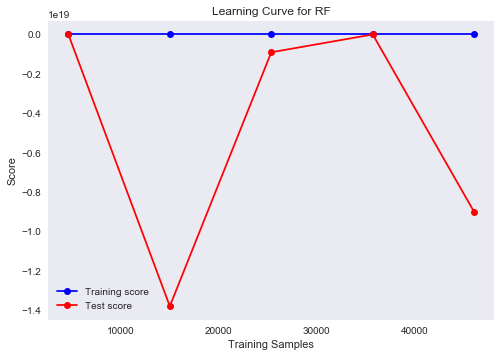

In [63]:

from sklearn.model_selection import learning_curve
train_size, train_score, test_score = learning_curve(estimator=regressor, X=x_train, y=y_train, cv=10 )

train_score_m = np.mean(train_score, axis=1)
test_score_m = np.mean(test_score, axis=1)

plt.plot(train_size, train_score_m, 'o-', color="b")
plt.plot(train_size, test_score_m, 'o-', color="r")
plt.legend(('Training score', 'Test score'), loc='best')
plt.xlabel("Training Samples")
plt.ylabel("Score")
plt.title("Learning Curve for RF")
plt.grid()

plt.show()

[ 4551  9102 13653 18204 22755 27306 31856 36408 40959]
Training scores:

 [[-24.87727117 -14.17381102 -14.17381102 -14.17381102 -14.17381102
  -14.17381102 -14.17381102 -14.17381102 -14.17381102]
 [-22.44741184 -16.12881378 -19.20089593 -19.20089593 -19.20089593
  -19.20089593 -19.20089593 -19.20089593 -19.20089593]
 [-26.28143191 -22.09689665 -23.88398257 -19.26392424 -19.26392424
  -19.26392424 -19.26392424 -19.26392424 -19.26392424]
 [-24.48383505 -21.16177468 -22.76857787 -19.84226618 -19.80202119
  -19.80202119 -19.80202119 -19.80202119 -19.80202119]
 [-24.3622774  -21.78615928 -22.94197906 -20.74243564 -21.86022803
  -21.86022803 -21.86022803 -21.86022803 -21.86022803]
 [-23.64215205 -21.42744246 -22.49014358 -20.56480745 -21.79523215
  -22.77522586 -22.77522586 -22.77522586 -22.77522586]
 [-23.1923241  -21.31704297 -22.19351139 -20.57172611 -21.59065647
  -22.05708646 -21.98163914 -21.98163914 -21.98163914]
 [-22.42100846 -20.73141875 -21.55692778 -20.09126042 -21.0016929
  -21

(2, 10)

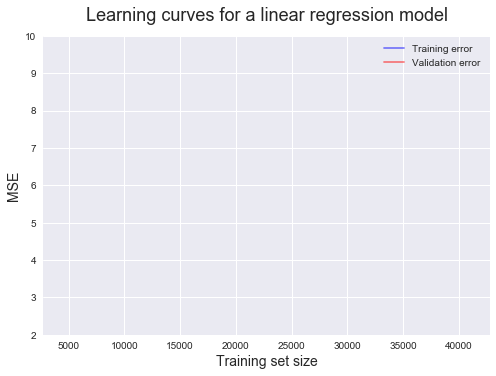

In [70]:
train_sizes, train_scores, validation_scores = learning_curve(
estimator = regressor,
X = x_train,
y = y_train, train_sizes = np.array([.1, .2, 0.30, .4, 0.50, 0.60, .7, .8, .9]), cv = 9,
scoring = 'neg_mean_squared_error')

print(train_sizes)
print('Training scores:\n\n', train_scores)
print('\n', '-' * 70) # separator to make the output easy to read
print('\nValidation scores:\n\n', validation_scores)
import matplotlib.pyplot as plt

train_scores_mean = -train_scores.mean(axis = 1)
validation_scores_mean = -validation_scores.mean(axis = 1)
print('Mean training scores\n\n', pd.Series(train_scores_mean))
print('\n', '-' * 20) # separator
print('\nMean validation scores\n\n',pd.Series(validation_scores_mean))

#plt.style.use('seaborn')
plt.plot(train_sizes, train_scores_mean, label = 'Training error',color ='b',alpha=0.5)
plt.plot(train_sizes, validation_scores_mean, label = 'Validation error',color ='r',alpha=0.5)
plt.ylabel('MSE', fontsize = 14)
plt.xlabel('Training set size', fontsize = 14)
plt.title('Learning curves for a linear regression model', fontsize = 18, y = 1.03)
plt.legend()
plt.ylim(2,10)

In [ ]:
from sklearn.linear_model import LinearRegression 
lm = LinearRegression() 
lm.fit(x_train,y_train) 
pred = lm.predict(x_validation)
pred

In [ ]:
from sklearn.model_selection import learning_curve
train_size, train_score, test_score = learning_curve(estimator=random_forest, X=X_train, y=y_train, cv=10 )

train_score_m = np.mean(train_score, axis=1)
test_score_m = np.mean(test_score, axis=1)

plt.plot(train_size, train_score_m, 'o-', color="b")
plt.plot(train_size, test_score_m, 'o-', color="r")
plt.legend(('Training score', 'Test score'), loc='best')
plt.xlabel("Training Samples")
plt.ylabel("Score")
plt.title("Learning Curve for RF")
plt.grid()

plt.show()

In [ ]:
lm.coef_[0]

In [ ]:
pd.DataFrame(pred).hist()

In [ ]:
import statsmodels.api as sm 
trainx=sm.add_constant(x_train)
model=sm.OLS(np.array(y_train),np.array(x_train)).fit()
predictions=model.predict(x_train)
print_model=model.summary()
print(print_model)

**Random Forest**

In [ ]:
from sklearn.ensemble import RandomForestRegressor

In [ ]:
rf = RandomForestRegressor(n_estimators=20, random_state=0)
rf.fit(x_train, y_train)
rf_predict = rf.predict(x_validation)

In [ ]:
rf_predict

In [ ]:
pd.DataFrame(rf_predict).hist()

In [ ]:
from sklearn import metrics

print('Mean Absolute Error:', metrics.mean_absolute_error(y_validation, rf_predict))
print('Mean Squared Error:', metrics.mean_squared_error(y_validation, rf_predict))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_validation, rf_predict)))

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier
model=GradientBoostingClassifier
model.fit(x_train,y_train)
y_train_predict=model.predict(x_train)
y_validation_pred=model.predict(x_validation)

**Testing**

In [ ]:
test=pd.read_csv('C:\\Users\\yugandhar\\Downloads\\modules\\20190915_Batch67_CSE7305c_ProblemArchitecting (1)\\20190915_Batch67_CSE7305c_ProblemArchitecting\\test.csv')

In [ ]:
test.shape

In [ ]:
test.head()

In [ ]:
test.describe()

In [ ]:
test.dtypes

In [ ]:
test1=test.drop(["TID","store_and_fwd_flag","tip_amount"],axis=1)

In [ ]:
test1.head()

In [ ]:
def getDistance(pickup_latitude, pickup_longitude, dropoff_latitude, dropoff_longitude):
    R_earth = 6371
    pickup_latitude, pickup_longitude, dropoff_latitude, dropoff_longitude = map(np.radians, [pickup_latitude, pickup_longitude, dropoff_latitude, dropoff_longitude])
    dlat = dropoff_latitude - pickup_latitude
    dlon = dropoff_longitude - pickup_longitude
    a = np.sin(dlat/2.0)*2 + np.cos(pickup_latitude) * np.cos(dropoff_latitude) * np.sin(dlon/2.0)*2
    return 2 * R_earth * np.arcsin(np.sqrt(a))
test1['dist'] = getDistance( taxi_data1.pickup_latitude,taxi_data1.pickup_longitude,taxi_data1.dropoff_latitude,taxi_data1.dropoff_longitude)


test1.pickup_datetime = pd.to_datetime(test1.pickup_datetime)
test1['pickup_time'] = test1.pickup_datetime.dt.time
test1['pickup_hour'] = test1.pickup_datetime.dt.hour
test1['pickup_day'] = test1.pickup_datetime.dt.day
test1['pickup_month'] = test1.pickup_datetime.dt.month
test1['pickup_weekday'] = test1.pickup_datetime.dt.weekday


test1.dropoff_datetime = pd.to_datetime(test1.dropoff_datetime)
test1['dropoff_time'] = test1.dropoff_datetime.dt.time
test1['dropoff_hour'] = test1.dropoff_datetime.dt.hour
test1['dropoff_day'] = test1.dropoff_datetime.dt.day
test1['dropoff_month'] = test1.dropoff_datetime.dt.month
test1['dropoff_weekday'] = test1.dropoff_datetime.dt.weekday

test1['duration']= test1.dropoff_datetime - test1.pickup_datetime

test1.duration=test1.duration.dt.total_seconds()
test1.duration=test1.duration/60

In [ ]:
test1.dtypes

In [ ]:
test1.head()

In [ ]:
test2=test1.drop(["pickup_datetime","dropoff_datetime","pickup_longitude","pickup_latitude","dropoff_longitude","dropoff_latitude","pickup_time","dropoff_time","dropoff_hour","dropoff_day","dropoff_month","dropoff_weekday","pickup_day","pickup_month","pickup_hour","pickup_weekday"],axis=1)

In [ ]:
test2.head()

In [ ]:
test2.isnull().sum()

In [ ]:
test2.dtypes

In [ ]:
cat_cols = ["new_user","rate_code","vendor_id","payment_type"]
num_cols = ["dist",'mta_tax','tolls_amount','duration','surcharge','passenger_count']
num_cols

In [ ]:
test2[cat_cols] = test2[cat_cols].apply(lambda x: x.astype('category'))
test2[num_cols] = test2[num_cols].apply(lambda x: x.astype('float'))
test2.dtypes

In [ ]:
num_data = test2.loc[:,num_cols]
cat_data = test2.loc[:,cat_cols]

In [ ]:
# Numeric columns imputation
imp = SimpleImputer(missing_values=np.nan, strategy='mean')
num_data = pd.DataFrame(imp.fit_transform(num_data),columns=num_cols)

# Categorical columns imputation
imp = SimpleImputer(missing_values=np.nan, strategy='most_frequent')
cat_data = pd.DataFrame(imp.fit_transform(cat_data),columns=cat_cols)


print(num_data.isnull().sum())
print(cat_data.isnull().sum())

In [ ]:
test3= pd.concat([num_data,cat_data],axis=1)

In [ ]:
test3.head()

In [ ]:
test3.shape

In [ ]:
test3 = test3[(test3['duration']<200)&(test3['duration']>0)]
test3 = test3[(test3['dist']<300)&(test3['dist']>0)]
test3 = test3[(test3['passenger_count']>0)]

In [ ]:
test3.describe()

In [ ]:
test4=pd.get_dummies(test3,columns=["new_user","vendor_id","rate_code","payment_type"])

In [ ]:
test4.head()

In [ ]:
test4.shape

In [ ]:
test4.columns

In [ ]:
x_train.columns

In [ ]:
missing_cols=set(x_train.columns)-set(test4.columns)
for c in missing_cols:
    test4[c]=0
test4=test4[x_train.columns]

In [ ]:
test4.shape

In [ ]:
standardizer = StandardScaler()
standardizer.fit(num_data)
num_data = pd.DataFrame(standardizer.transform(num_data),columns=num_cols)
test4[num_cols]=pd.DataFrame(standardizer.transform(num_data),columns=num_cols)


In [ ]:
test4.describe()

In [ ]:
#from sklearn import linear_model
#from sklearn.linear_model import LinearRegression
#regressor=LinearRegression()
#regressor.fit(x_train,y_train)

In [ ]:
#y_pred=regressor.predict(test4)

In [ ]:
#from sklearn.metrics import mean_squared_error
#np.sqrt(mean_squared_error(y_validation,y_pred))

In [ ]:
from sklearn.linear_model import LinearRegression 
lm = LinearRegression() 
lm.fit(x_train,y_train) 
pred = lm.predict(test4)
pred

In [ ]:
yz=pd.DataFrame(pred)
yz.hist()

In [ ]:
from sklearn.ensemble import RandomForestRegressor

In [ ]:
rf = RandomForestRegressor(n_estimators=20, random_state=0)
rf.fit(x_train, y_train)
rf_predict = rf.predict(test4)

In [ ]:
rf_predict

In [ ]:
pd.DataFrame(rf_predict).hist()

In [ ]:
pd.DataFrame(rf_predict).describe()